# NEON Foliar, Root, Litter Stoichiometry analysis

In this notebook, I will analyze foliar CNP data previously collected by NEON, alongside previously collected litter and root CN data and newly collected litter and root P data to look for patterns and links in plant-level stoichiometry across species and sites. 

### Datasets needed: 
 - P data from lab analyses, spring 2022
 - NEON database foliar data
 - NEON database litter and root CN data
 - NEON database site variables: Soil data; climate vars like MAT, MAP; species data

In [111]:
## Install packages
import rpy2
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr
base = importr('base')
utils = importr('utils')
stats = importr('stats')
from rpy2.rinterface_lib.callbacks import logger as rpy2_logger
import logging
rpy2_logger.setLevel(logging.ERROR)
utils.install_packages('neonUtilities', repos='https://cran.rstudio.com/');
neonUtilities = importr('neonUtilities')
raster = importr('raster')

#some resources for plotting
import matplotlib
import matplotlib.pyplot as plt
#import cartopy
#import cartopy.crs as ccrs
#import cartopy.feature as cfeature
import os,sys
from matplotlib import cm
from matplotlib.colors import ListedColormap,LinearSegmentedColormap

%matplotlib inline


The downloaded binary packages are in
	/var/folders/_g/j5dfnhqx19v1g0pvv_1nx_3c0000gn/T//RtmpSlb0CZ/downloaded_packages


ModuleNotFoundError: No module named 'cartopy'

In [61]:
##THIS ONLY HAS TO BE RUN ONE TIME
##Import and stack foliar data
neonUtilities.stackByTable(filepath='/Users/emmahauser/OneDrive - The University of Montana/NEON_LeafLitterAnalyses/NEON-Data/NEON_traits-foliar-2/stackedFiles');

In [4]:
#Reading stacked files
import os
os.listdir('/Users/emmahauser/OneDrive - The University of Montana/NEON_LeafLitterAnalyses/NEON-Data/NEON_traits-foliar-2/stackedFiles/')

['cfc_LMA.csv',
 'validation_10026.csv',
 'variables_10026.csv',
 'cfc_elements.csv',
 'readme_10026.txt',
 'cfc_fieldData.csv',
 'cfc_carbonNitrogen.csv',
 'cfc_chlorophyll.csv',
 'issueLog_10026.csv',
 'cfc_lignin.csv',
 'categoricalCodes_10026.csv',
 'cfc_chemistrySubsampling.csv']

In [128]:
## Read in and look at C,N,P foliar data
import pandas
elements = pandas.read_csv('/Users/emmahauser/OneDrive - The University of Montana/NEON_LeafLitterAnalyses/NEON-Data/NEON_traits-foliar-2/stackedFiles/cfc_elements.csv')
CNisotopes = pandas.read_csv('/Users/emmahauser/OneDrive - The University of Montana/NEON_LeafLitterAnalyses/NEON-Data/NEON_traits-foliar-2/stackedFiles/cfc_carbonNitrogen.csv')
FoliarCNP = pandas.merge(elements,CNisotopes,
                        on = "plotID",
                        how = 'outer')

##Add NP and CP vars to Foliar df

FoliarCNP['foliarCP'] = FoliarCNP.carbonPercent/FoliarCNP.foliarPhosphorusConc
FoliarCNP['foliarNP'] = FoliarCNP.nitrogenPercent/FoliarCNP.foliarPhosphorusConc


In [150]:
##Read in litter/root CNP data
litterCNP = pandas.read_csv('/Users/emmahauser/OneDrive - The University of Montana/NEON_LeafLitterAnalyses/NEON-data/litterCNP.csv')
rootCNP = pandas.read_csv('/Users/emmahauser/OneDrive - The University of Montana/NEON_LeafLitterAnalyses/NEON-data/rootCNP.csv')

##Add CP, NP vars to each df
##Add root N:P and litter N:P
litterCNP['LitterNP'] = litterCNP.percent_N_litter/litterCNP.percent_P_litter
litterCNP['LitterCP'] = litterCNP.percent_C_litter/litterCNP.percent_P_litter

rootCNP['rootNP'] = rootCNP.percent_N_root/rootCNP.percent_P_root
rootCNP['rootCP'] = rootCNP.percent_C_root/rootCNP.percent_P_root

LitterMeans = litterCNP.groupby('plotID').mean()
RootMeans = rootCNP.groupby('plotID').mean()


In [152]:
pandas.set_option("display.max_columns()",None)
litterCNP

,ID,occurrenceID,catalogNumber,otherCatalogNumbers,NEON_ID,Absorbance,Slope,Intercept,ppm_P_litter,mg P_g litter,percent_P_litter,percent_C_litter,percent_N_litter,CN_litter,13C_litter,15N_litter,plotID,decimalLatitude,decimalLongitude,Site,LitterNP,LitterCP
0,1,NEON01164,NEON01164,NEON sampleCode (barcode): A00000032819; NEON ...,241830,1.005000,0.0508,0.1402,17.023622,0.851181,0.000851,51.19,1.03,49.600000,-29.7,-4.2,HARV_051,42.534090,-72.179145,HARV,1210.083402,60139.970230
1,2,NEON0116M,NEON0116M,NEON sampleCode (barcode): A00000032742; NEON ...,241862,0.674000,0.0508,0.1402,10.507874,0.525394,0.000525,53.77,0.63,85.349206,-28.7,-1.1,HARV_039,42.533244,20.000000,HARV,1199.100104,102342.242203
2,3,NEON0116N,NEON0116N,NEON sampleCode (barcode): A00000032757; NEON ...,241864,1.813667,0.0508,0.1402,32.942257,1.647113,0.001647,51.21,0.91,56.500000,-29.8,-3.4,HARV_039,42.533244,20.000000,HARV,552.481827,31090.763050
3,4,NEON0116S,NEON0116S,NEON sampleCode (barcode): A00000032788; NEON ...,241874,1.662000,0.0508,0.1402,29.956693,1.497835,0.001498,52.19,0.94,55.300000,-30.8,-5.1,HARV_035,42.539971,-72.178087,HARV,627.572463,34843.624298
4,5,NEON0116T,NEON0116T,NEON sampleCode (barcode): A00000032796; NEON ...,241876,0.648500,0.0508,0.1402,8.560825,0.428041,0.000428,53.66,0.61,87.700000,-28.5,-3.0,HARV_034,42.535693,-72.177962,HARV,1425.097129,125361.822816
5,6,NEON0116U,NEON0116U,NEON sampleCode (barcode): A00000032792; NEON ...,241878,1.184000,0.0508,0.1402,20.547244,1.027362,0.001027,50.34,0.78,64.600000,-30.5,-5.0,HARV_034,42.535693,-72.177962,HARV,759.226057,48999.281655
6,7,NEON0116V,NEON0116V,NEON sampleCode (barcode): A00000032823; NEON ...,241880,0.818667,0.0508,0.1402,13.355643,0.667782,0.000668,53.69,0.53,101.301887,-28.9,1.9,HARV_033,42.538310,-72.175606,HARV,793.672186,80400.489980
7,8,NEON0116W,NEON0116W,NEON sampleCode (barcode): A00000032807; NEON ...,241882,1.229667,0.0508,0.1402,21.446194,1.072310,0.001072,50.15,0.99,50.800000,-29.2,-3.0,HARV_033,42.538310,-72.175606,HARV,923.240481,46768.192034
8,9,NEON0118M,NEON0118M,NEON sampleID: NEON.ltr.SCBI062.20171113.lvs.ar,246683,1.130667,0.0508,0.1402,19.497375,0.974869,0.000975,50.39,0.87,57.800000,-29.8,-2.7,SCBI_062,38.895117,-78.138236,SCBI,892.427598,51688.996163
9,10,NEON0118Q,NEON0118Q,NEON sampleID: NEON.ltr.SCBI048.20171113.lvs.ar,246687,0.797333,0.0508,0.1402,12.935695,0.646785,0.000647,50.76,0.97,52.400000,-30.5,-2.3,SCBI_048,38.892604,-78.135922,SCBI,1499.725566,78480.484241


In [155]:
##Merge datasets so that they are aligned by plot ID

LitterRootCNP = pandas.merge(LitterMeans,RootMeans, on = "plotID", how = 'outer')
LitterRootCNP
##Make a site variable column
#LitterRootCNP['Site'] = LitterRootCNP['plotID'].str.split('_').str[0]
#rootCNP['Site'] = rootCNP['plotID'].str.split('_').str[0]

,ID_x,NEON_ID_x,Absorbance_x,Slope _x,Intercept_x,ppm_P_litter,mg P_g litter,percent_P_litter,percent_C_litter,percent_N_litter,CN_litter,13C_litter,15N_litter,decimalLatitude_x,decimalLongitude_x,LitterNP,LitterCP,ID_y,NEON_ID_y,Absorbance_y,Slope _y,Intercept_y,ppm_P_root,mg P_g_root,percent_P_root,percent_C_root,percent_N_root,CN_root,13C_root,15N_root,decimalLatitude_y,decimalLongitude_y,rootNP,rootCP
plotID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
BONA_071,49.0,733238.0,0.828333,0.0508,0.1402,13.545932,0.677297,0.000677,50.470,0.310,162.806452,-28.80,-5.40,65.154979,-147.507196,457.701717,74516.792485,133.5,730406.0,0.975000,0.0508,0.1402,16.433071,0.821654,0.000822,50.8900,0.7850,65.750000,-27.550,-1.300,65.154979,-147.507196,1047.035530,71317.074943
BONA_075,48.0,733236.0,2.923333,0.0508,0.1402,53.615250,2.680763,0.002681,51.140,1.000,51.200000,-29.20,-3.30,65.158209,-147.507859,373.028127,19076.658399,131.5,730433.0,1.227500,0.0508,0.1402,21.958254,1.097913,0.001098,49.2750,1.0850,49.500000,-28.450,-1.850,65.158209,-147.507859,996.547828,49469.837883
BONA_076,47.0,733235.0,1.874333,0.0508,0.1402,34.136483,1.706824,0.001707,50.110,0.240,208.791667,-29.50,-4.00,65.155812,-147.502084,140.612037,29358.621627,129.5,730434.5,1.075167,0.0508,0.1402,18.404856,0.920243,0.000920,50.2650,0.7450,73.700000,-28.300,0.500,65.155812,-147.502084,847.374345,64497.691135
BONA_084,46.0,733230.0,2.530000,0.0508,0.1402,47.043307,2.352165,0.002352,49.860,0.980,50.700000,-29.40,-7.10,65.155247,-147.512957,416.637438,21197.492523,127.5,730482.0,1.785833,0.0508,0.1402,32.394357,1.619718,0.001620,46.8000,0.9975,56.225000,-29.850,0.500,65.155247,-147.512957,593.078949,30183.279991
BONA_093,44.5,733224.5,2.390667,0.0508,0.1402,47.748585,2.387429,0.002387,50.335,0.615,102.100000,-29.55,-4.85,65.155786,-147.504653,279.180266,30408.595775,125.5,730511.0,1.557833,0.0508,0.1402,27.039106,1.351955,0.001352,49.3450,0.8350,61.800000,-27.550,-0.750,65.155786,-147.504653,629.562985,39376.065003
DELA_040,24.0,665416.0,2.412000,0.0508,0.1402,44.720472,2.236024,0.002236,48.350,1.320,36.500000,-29.20,2.20,32.538810,-87.804512,590.333556,21623.202613,95.5,394478.0,1.696333,0.0508,0.1402,30.632546,1.531627,0.001532,43.6500,0.9100,57.350000,-28.650,3.150,32.538810,-87.804512,575.070439,28901.319032
DELA_041,25.0,665417.0,1.925000,0.0508,0.1402,35.133858,1.756693,0.001757,48.150,0.990,48.500000,-29.20,1.50,32.540703,-87.807742,563.558914,27409.456291,97.5,394480.5,1.337500,0.0508,0.1402,23.568898,1.178445,0.001178,47.2050,0.9100,56.150000,-28.700,4.550,32.540703,-87.807742,761.568708,40221.299410
DELA_042,26.0,665418.0,1.460250,0.0508,0.1402,25.985236,1.299262,0.001299,46.440,1.200,38.900000,-30.60,-0.50,32.541787,-87.805204,923.601244,35743.368158,99.5,394483.5,1.331667,0.0508,0.1402,23.454068,1.172703,0.001173,44.0000,0.7050,66.850000,-29.350,2.100,32.541787,-87.805204,591.797635,38236.860535
DELA_043,27.0,665419.0,1.498333,0.0508,0.1402,26.734908,1.336745,0.001337,46.690,1.220,38.200000,-29.30,1.00,32.540689,-87.806192,912.664719,34928.127653,101.5,394487.0,1.584000,0.0508,0.1402,28.855865,1.442793,0.001443,42.5700,1.4000,32.750000,-28.450,0.500,32.539604,-87.806783,1005.669877,29849.790127


### First look at plots of litter vs root CP, NP, CN

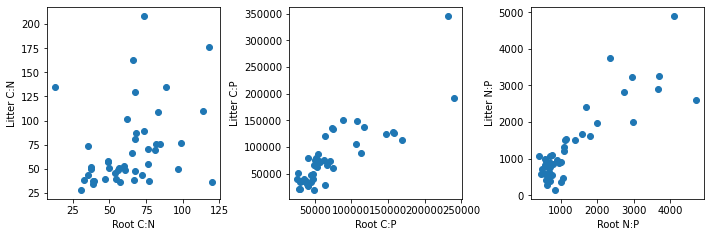

In [122]:
plt.figure(figsize=(18,8))
plt.subplot(2,5,1)
plt.scatter(LitterRootCNP.CN_root, LitterRootCNP.CN_litter)
#plt.legend(loc="lower right")
plt.xlabel("Root C:N")
plt.ylabel("Litter C:N") ;

plt.subplot(2,5,2)
plt.scatter(LitterRootCNP.rootCP, LitterRootCNP.LitterCP)
#plt.legend(loc="lower right")
plt.xlabel("Root C:P")
plt.ylabel("Litter C:P") ;

plt.subplot(2,5,3)
plt.scatter(LitterRootCNP.rootNP, LitterRootCNP.LitterNP)
#plt.legend(loc="lower right")
plt.xlabel("Root N:P")
plt.ylabel("Litter N:P") ;
plt.subplots_adjust(left=0.02,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4);

In [129]:
SubVars = ["percent_P_litter", "percent_C_litter", "percent_N_litter", "CN_litter", "13C_litter", "15N_litter", "decimalLatitude_x", "decimalLongitude_x", "percent_P_root", "percent_C_root", "percent_N_root", "CN_root", "13C_root", "15N_root", "LitterCP","LitterNP", "rootCP","rootNP"]
LitterRootCNP = LitterRootCNP[SubVars]
pandas.set_option("display.max_columns()",None)
LitterRootCNP

,percent_P_litter,percent_C_litter,percent_N_litter,CN_litter,13C_litter,15N_litter,decimalLatitude_x,decimalLongitude_x,percent_P_root,percent_C_root,percent_N_root,CN_root,13C_root,15N_root,LitterCP,LitterNP,rootCP,rootNP
plotID,,,,,,,,,,,,,,,,,,
BONA_071,0.000677,50.470,0.310,162.806452,-28.80,-5.40,65.154979,-147.507196,0.000822,50.8900,0.7850,65.750000,-27.550,-1.300,74516.792485,457.701717,71317.074943,1047.035530
BONA_075,0.002681,51.140,1.000,51.200000,-29.20,-3.30,65.158209,-147.507859,0.001098,49.2750,1.0850,49.500000,-28.450,-1.850,19076.658399,373.028127,49469.837883,996.547828
BONA_076,0.001707,50.110,0.240,208.791667,-29.50,-4.00,65.155812,-147.502084,0.000920,50.2650,0.7450,73.700000,-28.300,0.500,29358.621627,140.612037,64497.691135,847.374345
BONA_084,0.002352,49.860,0.980,50.700000,-29.40,-7.10,65.155247,-147.512957,0.001620,46.8000,0.9975,56.225000,-29.850,0.500,21197.492523,416.637438,30183.279991,593.078949
BONA_093,0.002387,50.335,0.615,102.100000,-29.55,-4.85,65.155786,-147.504653,0.001352,49.3450,0.8350,61.800000,-27.550,-0.750,30408.595775,279.180266,39376.065003,629.562985
DELA_040,0.002236,48.350,1.320,36.500000,-29.20,2.20,32.538810,-87.804512,0.001532,43.6500,0.9100,57.350000,-28.650,3.150,21623.202613,590.333556,28901.319032,575.070439
DELA_041,0.001757,48.150,0.990,48.500000,-29.20,1.50,32.540703,-87.807742,0.001178,47.2050,0.9100,56.150000,-28.700,4.550,27409.456291,563.558914,40221.299410,761.568708
DELA_042,0.001299,46.440,1.200,38.900000,-30.60,-0.50,32.541787,-87.805204,0.001173,44.0000,0.7050,66.850000,-29.350,2.100,35743.368158,923.601244,38236.860535,591.797635
DELA_043,0.001337,46.690,1.220,38.200000,-29.30,1.00,32.540689,-87.806192,0.001443,42.5700,1.4000,32.750000,-28.450,0.500,34928.127653,912.664719,29849.790127,1005.669877


In [130]:
FoliarCNPMeans = FoliarCNP.groupby('plotID').mean()

In [131]:
CNPPools = pandas.merge(LitterRootCNP, FoliarCNPMeans, on = 'plotID', how = 'left')

In [139]:
CNPPools
##Subset rows that are non-NA for plot specific analysis. Do site averages for more general analysis.
CNPPools2 = CNPPools.dropna(subset = ['foliarPhosphorusConc', 'percent_P_root'])

In [148]:
CNPPools

,percent_P_litter,percent_C_litter,percent_N_litter,CN_litter,13C_litter,15N_litter,decimalLatitude_x,decimalLongitude_x,percent_P_root,percent_C_root,percent_N_root,CN_root,13C_root,15N_root,LitterCP,LitterNP,rootCP,rootNP,analyticalRepNumber_x,dryMass,digestVolume,foliarPhosphorusConc,foliarPotassiumConc,foliarCalciumConc,foliarMagnesiumConc,foliarSulfurConc,foliarManganeseConc,foliarIronConc,foliarCopperConc,foliarBoronConc,foliarZincConc,dataQF_x,d15N,d13C,nitrogenPercent,carbonPercent,CNratio,analyticalRepNumber_y,remarks_y,foliarCP,foliarNP
plotID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
BONA_071,0.000677,50.470,0.310,162.806452,-28.80,-5.40,65.154979,-147.507196,0.000822,50.8900,0.7850,65.750000,-27.550,-1.300,74516.792485,457.701717,71317.074943,1047.035530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BONA_075,0.002681,51.140,1.000,51.200000,-29.20,-3.30,65.158209,-147.507859,0.001098,49.2750,1.0850,49.500000,-28.450,-1.850,19076.658399,373.028127,49469.837883,996.547828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BONA_076,0.001707,50.110,0.240,208.791667,-29.50,-4.00,65.155812,-147.502084,0.000920,50.2650,0.7450,73.700000,-28.300,0.500,29358.621627,140.612037,64497.691135,847.374345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BONA_084,0.002352,49.860,0.980,50.700000,-29.40,-7.10,65.155247,-147.512957,0.001620,46.8000,0.9975,56.225000,-29.850,0.500,21197.492523,416.637438,30183.279991,593.078949,1.0,0.202250,25.0,0.233750,1.342500,1.326250,0.263250,0.177500,179.825000,48.375000,6.675000,3.400000,115.050000,NaN,-2.100000,-31.900000,2.212500,47.825000,23.775000,1.000000,NaN,209.339497,9.684551
BONA_093,0.002387,50.335,0.615,102.100000,-29.55,-4.85,65.155786,-147.504653,0.001352,49.3450,0.8350,61.800000,-27.550,-0.750,30408.595775,279.180266,39376.065003,629.562985,1.0,0.199250,25.0,0.197000,0.797500,1.245750,0.175000,0.109000,671.675000,27.600000,2.800000,2.500000,66.425000,NaN,-3.650000,-30.350000,1.075000,47.850000,54.900000,1.000000,NaN,259.250862,5.824340
DELA_040,0.002236,48.350,1.320,36.500000,-29.20,2.20,32.538810,-87.804512,0.001532,43.6500,0.9100,57.350000,-28.650,3.150,21623.202613,590.333556,28901.319032,575.070439,1.0,0.205000,25.0,0.295500,1.223000,0.587500,0.211500,0.210000,264.500000,267.250000,18.100000,13.700000,33.300000,NaN,3.366667,-30.033333,2.630000,51.466667,21.766667,1.333333,NaN,199.611498,10.200354
DELA_041,0.001757,48.150,0.990,48.500000,-29.20,1.50,32.540703,-87.807742,0.001178,47.2050,0.9100,56.150000,-28.700,4.550,27409.456291,563.558914,40221.299410,761.568708,1.0,0.199333,25.0,0.166333,0.691000,0.417667,0.281333,0.138000,762.800000,49.600000,4.866667,24.500000,24.566667,NaN,3.233333,-30.666667,2.446667,49.693333,22.200000,1.000000,NaN,299.471203,14.744557
DELA_042,0.001299,46.440,1.200,38.900000,-30.60,-0.50,32.541787,-87.805204,0.001173,44.0000,0.7050,66.850000,-29.350,2.100,35743.368158,923.601244,38236.860535,591.797635,1.0,0.198000,25.0,0.188000,0.865000,1.244500,0.312000,0.173000,1384.150000,49.550000,9.150000,20.950000,67.150000,NaN,1.050000,-30.200000,2.495000,47.935000,19.250000,1.000000,NaN,256.395243,13.345283
DELA_043,0.001337,46.690,1.220,38.200000,-29.30,1.00,32.540689,-87.806192,0.001443,42.5700,1.4000,32.750000,-28.450,0.500,34928.127653,912.664719,29849.790127,1005.669877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Plot Foliar, vs Litter vs Root, CN, CP, NP for subset with plot specific values

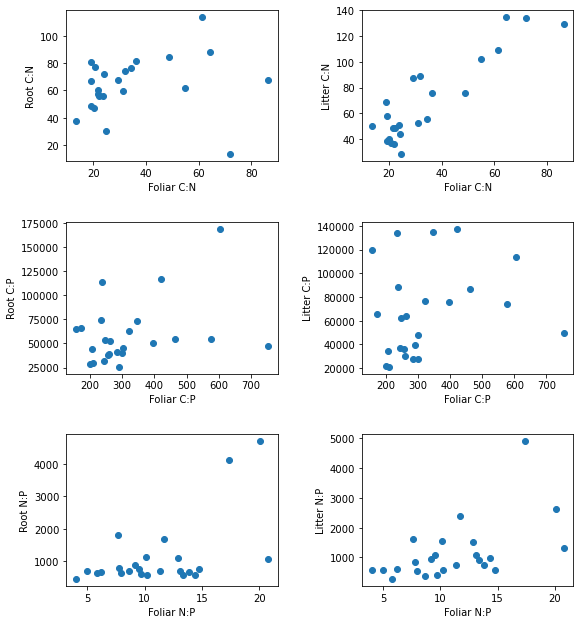

In [147]:
###This needs to be made nicer in a for loop

plt.figure(figsize=(8,10))
plt.subplot(3,2,1)
plt.scatter(CNPPools2.CNratio, CNPPools2.CN_root)
#plt.legend(loc="lower right")
plt.xlabel("Foliar C:N")
plt.ylabel("Root C:N") ;

plt.subplot(3,2,3)
plt.scatter(CNPPools2.foliarCP, CNPPools2.rootCP)
#plt.legend(loc="lower right")
plt.xlabel("Foliar C:P")
plt.ylabel("Root C:P") ;

plt.subplot(3,2,5)
plt.scatter(CNPPools2.foliarNP, CNPPools2.rootNP)
#plt.legend(loc="lower right")
plt.xlabel("Foliar N:P")
plt.ylabel("Root N:P") ;

plt.subplot(3,2,2)
plt.scatter(CNPPools2.CNratio, CNPPools2.CN_litter)
#plt.legend(loc="lower right")
plt.xlabel("Foliar C:N")
plt.ylabel("Litter C:N") ;

plt.subplot(3,2,4)
plt.scatter(CNPPools2.foliarCP, CNPPools2.LitterCP)
#plt.legend(loc="lower right")
plt.xlabel("Foliar C:P")
plt.ylabel("Litter C:P") ;

plt.subplot(3,2,6)
plt.scatter(CNPPools2.foliarNP, CNPPools2.LitterNP)
#plt.legend(loc="lower right")
plt.xlabel("Foliar N:P")
plt.ylabel("Litter N:P") ;

plt.subplots_adjust(left=0.02,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4);

### Now use site averages to make the same plots as above

### Download NEON environmental variables 

In [75]:
SoilDatInitial = neonUtilities.loadByProduct(dpID = "DP1.10047.001", site= ["BONA","DELA","GUAN","HARV","MLBS", "PUUM", "SCBI","SJER","UNDE","WREF"], 
                  package="expanded")

Finding available files
  |======================================================================| 100%

Continuing will download files totaling approximately 2.057558 MB. Do you want to proceed y/n: Y
  |======================================================================| 100%

Unpacking zip files using 1 cores.
  |                                                  | 0 % ~calculating   |++++                                              | 7 % ~00s           |+++++++                                           | 13% ~00s           |++++++++++                                        | 20% ~00s           |++++++++++++++                                    | 27% ~00s           |+++++++++++++++++                                 | 33% ~00s           |++++++++++++++++++++                              | 40% ~00s           |++++++++++++++++++++++++                          | 47% ~00s           |+++++++++++++++++++++++++++                       | 53% ~00s           |++++++++++++++++++++++++++++++ 

In [76]:
SoilDatDistributed = neonUtilities.loadByProduct(dpID = "DP1.10086.001", site= ["BONA","DELA","GUAN","HARV","MLBS", "PUUM", "SCBI","SJER","UNDE","WREF"], 
                  package="expanded")

Finding available files
  |======================================================================| 100%

Rate limit reached. Pausing for 99 seconds to reset.

Continuing will download files totaling approximately 10.305175 MB. Do you want to proceed y/n: y
  |======================================================================| 100%

Unpacking zip files using 1 cores.
  |                                                  | 0 % ~calculating   |+                                                 | 1 % ~02s           |++                                                | 3 % ~01s           |+++                                               | 4 % ~01s           |+++                                               | 6 % ~01s           |++++                                              | 7 % ~01s           |+++++                                             | 9 % ~01s           |++++++                                            | 10% ~01s           |++++++                                          

  |                                                  | 0 % ~calculating   |+                                                 | 2 % ~00s           |++                                                | 4 % ~00s           |+++                                               | 6 % ~00s           |++++                                              | 7 % ~00s           |+++++                                             | 9 % ~00s           |++++++                                            | 11% ~00s           |+++++++                                           | 13% ~00s           |++++++++                                          | 15% ~00s           |+++++++++                                         | 17% ~00s           |++++++++++                                        | 19% ~00s           |+++++++++++                                       | 20% ~00s           |++++++++++++                                      | 22% ~00s           |+++++++++++++                                     | 24% ~00s 

  |                                                  | 0 % ~calculating   |+                                                 | 1 % ~01s           |++                                                | 3 % ~01s           |+++                                               | 4 % ~01s           |+++                                               | 6 % ~01s           |++++                                              | 7 % ~01s           |+++++                                             | 9 % ~01s           |++++++                                            | 10% ~01s           |++++++                                            | 12% ~01s           |+++++++                                           | 13% ~01s           |++++++++                                          | 15% ~01s           |+++++++++                                         | 16% ~01s           |+++++++++                                         | 18% ~01s           |++++++++++                                        | 19% ~01s 

  |                                                  | 0 % ~calculating   |+                                                 | 1 % ~01s           |++                                                | 2 % ~01s           |++                                                | 4 % ~01s           |+++                                               | 5 % ~01s           |++++                                              | 6 % ~01s           |++++                                              | 7 % ~01s           |+++++                                             | 8 % ~01s           |+++++                                             | 10% ~01s           |++++++                                            | 11% ~01s           |+++++++                                           | 12% ~01s           |+++++++                                           | 13% ~01s           |++++++++                                          | 14% ~01s           |++++++++                                          | 16% ~01s 

  |                                                  | 0 % ~calculating   |+                                                 | 1 % ~01s           |++                                                | 2 % ~01s           |++                                                | 3 % ~01s           |+++                                               | 4 % ~01s           |+++                                               | 5 % ~01s           |++++                                              | 7 % ~01s           |++++                                              | 8 % ~01s           |+++++                                             | 9 % ~01s           |+++++                                             | 10% ~01s           |++++++                                            | 11% ~01s           |+++++++                                           | 12% ~01s           |+++++++                                           | 13% ~01s           |++++++++                                          | 14% ~01s 

  |                                                  | 0 % ~calculating   |++                                                | 2 % ~00s           |+++                                               | 4 % ~00s           |++++                                              | 6 % ~00s           |+++++                                             | 9 % ~00s           |++++++                                            | 11% ~00s           |+++++++                                           | 13% ~00s           |++++++++                                          | 15% ~00s           |+++++++++                                         | 17% ~00s           |++++++++++                                        | 19% ~00s           |+++++++++++                                       | 21% ~00s           |++++++++++++                                      | 23% ~00s           |+++++++++++++                                     | 26% ~00s           |++++++++++++++                                    | 28% ~00s 

  |                                                  | 0 % ~calculating   |++                                                | 2 % ~00s           |+++                                               | 4 % ~00s           |++++                                              | 6 % ~00s           |+++++                                             | 9 % ~00s           |++++++                                            | 11% ~00s           |+++++++                                           | 13% ~00s           |++++++++                                          | 15% ~00s           |+++++++++                                         | 17% ~00s           |++++++++++                                        | 19% ~00s           |+++++++++++                                       | 21% ~00s           |++++++++++++                                      | 23% ~00s           |+++++++++++++                                     | 26% ~00s           |++++++++++++++                                    | 28% ~00s 

In [77]:
SoilDatMegapit = neonUtilities.loadByProduct(dpID = "DP1.00096.001", site= ["BONA","DELA","GUAN","HARV","MLBS", "PUUM", "SCBI","SJER","UNDE","WREF"], 
                  package="expanded")

Finding available files
  |======================================================================| 100%
No expanded package found for site BONA and month 2017-03. Basic package downloaded instead.
No expanded package found for site DELA and month 2013-04. Basic package downloaded instead.
No expanded package found for site GUAN and month 2015-04. Basic package downloaded instead.
No expanded package found for site HARV and month 2012-07. Basic package downloaded instead.
No expanded package found for site MLBS and month 2013-12. Basic package downloaded instead.
No expanded package found for site PUUM and month 2018-06. Basic package downloaded instead.
No expanded package found for site SCBI and month 2013-05. Basic package downloaded instead.
No expanded package found for site SJER and month 2016-11. Basic package downloaded instead.
No expanded package found for site UNDE and month 2013-09. Basic package downloaded instead.
No expanded package found for site WREF and month 2017-09. 

In [101]:
pandas.set_option("display.max_columns()",None)
SoilDatDistributed.names

'bgc_CNis...,'categori...,'issueLog...,...,'sls_soil...,'validati...,'variable...


### Step 1 Plots: Sites that have exact match foliar, root, litter data